In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import matplotlib as mpl
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [70]:
df = pd.read_csv('/content/diamonds.csv')

In [71]:
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [72]:
scaler=MinMaxScaler()
scaler.fit(df[['carat']])
df['carat']=scaler.transform(df[['carat']])
scaler.fit(df[['price']])
df.price=scaler.transform(df[['price']])

In [73]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['price','carat']])
#присваивание номеров кластеров пользователям
df['cluster']=y_predicted
km.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.05800622, 0.05768426],
       [0.69703341, 0.31614875],
       [0.28501569, 0.18702499]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

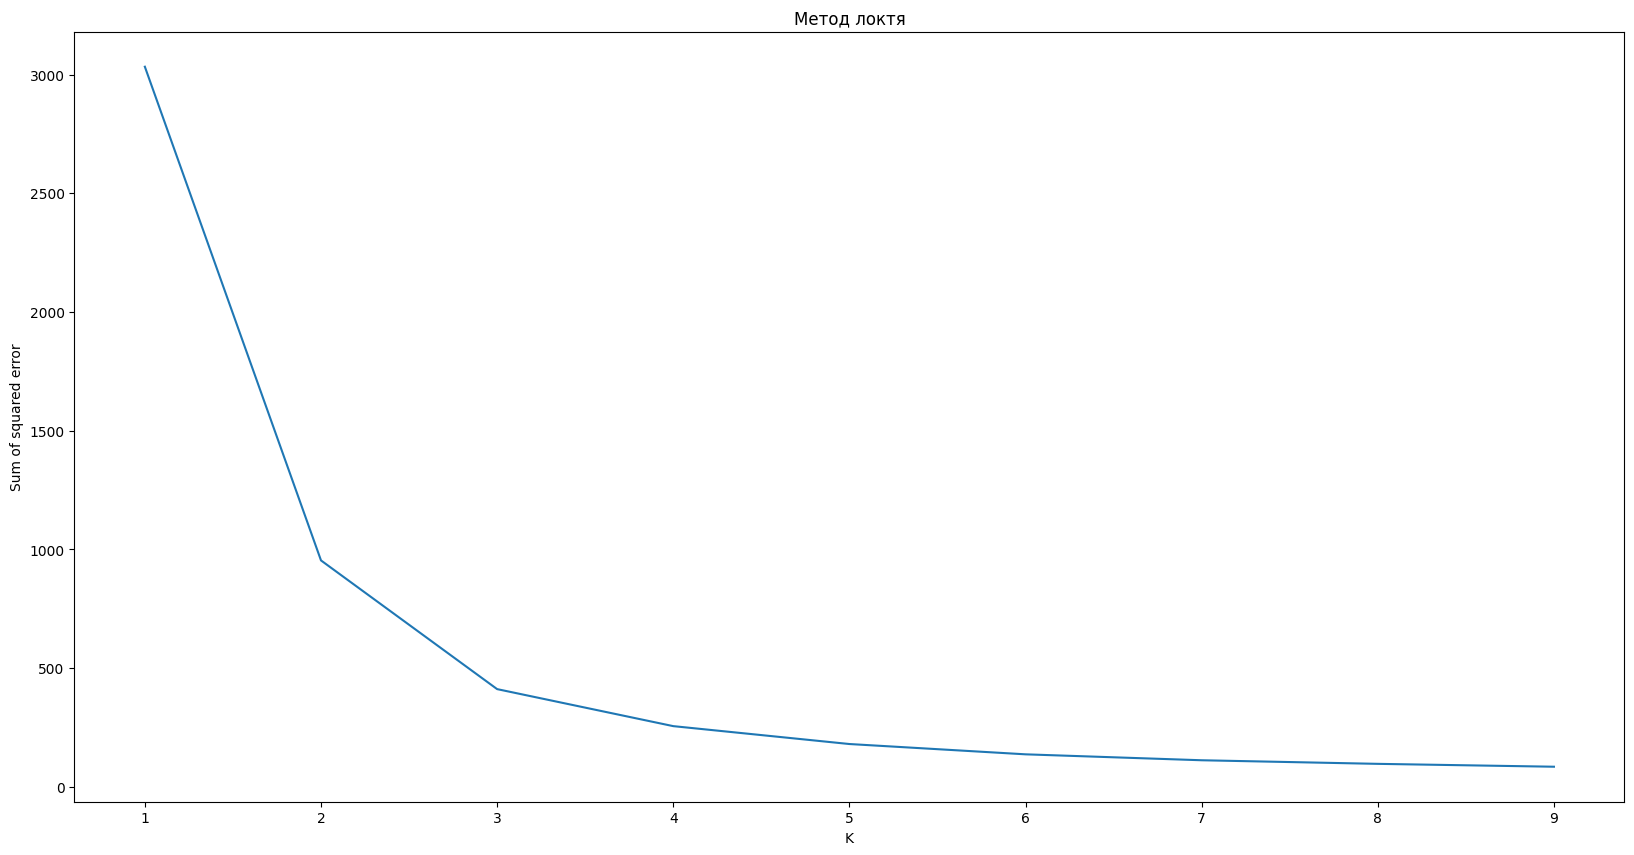

In [76]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['price','carat']])
  sse.append(km.inertia_)

plt.figure(figsize=(20,10))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Метод локтя')
plt.plot(k_rng,sse)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cluster
0,1,0.006237,Ideal,E,SI2,61.5,55.0,0.000000,3.95,3.98,2.43,0
1,2,0.002079,Premium,E,SI1,59.8,61.0,0.000000,3.89,3.84,2.31,0
2,3,0.006237,Good,E,VS1,56.9,65.0,0.000054,4.05,4.07,2.31,0
3,4,0.018711,Premium,I,VS2,62.4,58.0,0.000433,4.20,4.23,2.63,0
4,5,0.022869,Good,J,SI2,63.3,58.0,0.000487,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.108108,Ideal,D,SI1,60.8,57.0,0.131427,5.75,5.76,3.50,0
53936,53937,0.108108,Good,D,SI1,63.1,55.0,0.131427,5.69,5.75,3.61,0
53937,53938,0.103950,Very Good,D,SI1,62.8,60.0,0.131427,5.66,5.68,3.56,0
53938,53939,0.137214,Premium,H,SI2,61.0,58.0,0.131427,6.15,6.12,3.74,0


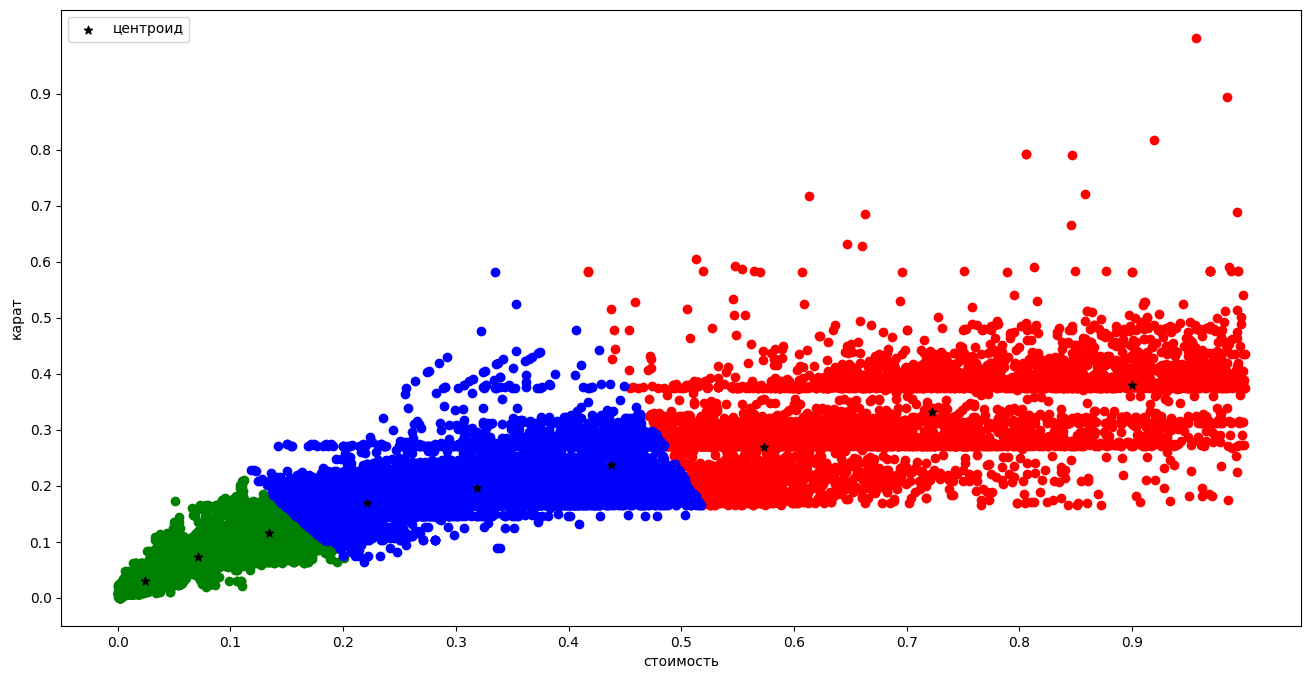

In [86]:
data1=df[df.cluster==0]
data2=df[df.cluster==1]
data3=df[df.cluster==2]

plt.figure(figsize=(16,8))

plt.scatter(data1.price,data1.carat,color='green')
plt.scatter(data2.price,data2.carat,color='red')
plt.scatter(data3.price,data3.carat,color='blue')
# plt.scatter(data3.order_cost,data3.delivery_time,color='purple')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='центроид')


plt.xlabel('стоимость')
plt.ylabel('карат')
plt.legend()
data1

In [88]:
one=np.mean(data2['price'])
second=np.mean(data2['carat'])
print(f'Второй кластер:\nСредняя цена: {one}\nСредняя стоимость карата: {second}')


one=np.mean(data3['price'])
second=np.mean(data3['carat'])
print(f'Третий кластер:\nСредняя цена: {one}\nСредняя стоимость карата: {second}')

Второй кластер:
Средняя цена: 0.6974060264760733
Средняя стоимость карата: 0.3163257726981533
Третий кластер:
Средняя цена: 0.2851620781166935
Средняя стоимость карата: 0.1870491346979793
